In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
from google.colab import drive

In [53]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
%cd "/content/drive/My Drive/data"

/content/drive/My Drive/data


In [0]:
columns = ["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hrs_per_week","native_country","income"]

In [0]:
df1 = pd.read_csv("adult.csv",header = None,names = columns )
df2 = pd.read_csv("adult_test.csv",header=None,names=columns,skiprows=1)

In [214]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [215]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hrs_per_week    32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [0]:
categorical = ["workclass","education","marital_status","occupation","relationship","race","sex","native_country"]

In [217]:
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [218]:
print(df1.shape)
print(df2.shape)

(32561, 15)
(16281, 15)


In [219]:
# Checking for null values in dataset
df1.apply(lambda x: x.isnull().sum(),axis =0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hrs_per_week      0
native_country    0
income            0
dtype: int64

In [0]:
#df1.apply(lambda x: x.unique(),axis =0)
#df1["workclass"].unique()

In [0]:
# Function for checking unique values in dataset
def unique_val(x):
  return(df1[x].unique())

In [222]:
for i in columns:
  y= unique_val(i)
  print(i,y)

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt [ 77516  83311 215646 ...  34066  84661 257302]
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education_num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital_status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-o

In [0]:
# These method didn't replace " ?" in original dataset, maybe because they return a copy 
#df1.apply(lambda x: x.replace(' ?','np.nan'))
#df1.replace(to_replace =" ?", value ="np.nan") 
#df1.dropna(inplace=True)

In [224]:
df1[df1==' ?'] = np.nan
df2[df2==' ?'] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [225]:
df1.dropna(inplace = True)
df2.dropna(inplace = True)
print(df1.shape)
print(df2.shape)

(30162, 15)
(15060, 15)


### **Trying some exploratory data analysis**

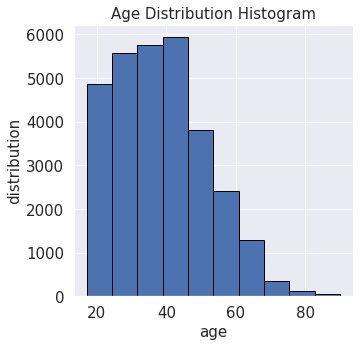

In [226]:
plt.hist(df1["age"],edgecolor = 'black')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('age',fontsize=15)
plt.ylabel('distribution',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Age Distribution Histogram',fontsize=15)
plt.show()

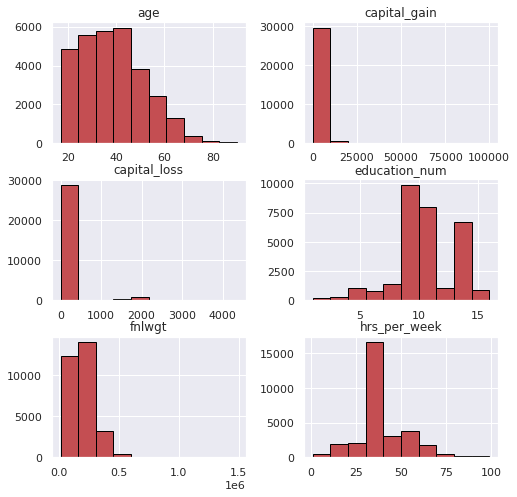

In [227]:
df1.hist(edgecolor = 'black',color='r')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [0]:
#plt.scatter(df1["education"],df1["hrs_per_week"])
#plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

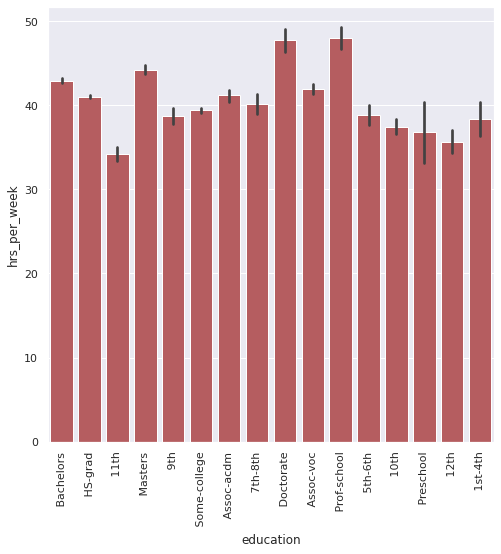

In [229]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
sns.barplot(df1["education"],df1["hrs_per_week"],color='r')
plt.xticks(rotation=90)

In [230]:
#Checking non-linear correlation between numeric features
df1.corr(method="spearman")

,age,fnlwgt,education_num,capital_gain,capital_loss,hrs_per_week
age,1.000000,-0.078438,0.070416,0.121936,0.061171,0.155916
fnlwgt,-0.078438,1.000000,-0.035712,-0.007336,-0.007970,-0.025688
education_num,0.070416,-0.035712,1.000000,0.120848,0.074593,0.168448
capital_gain,0.121936,-0.007336,0.120848,1.000000,-0.067435,0.095189
capital_loss,0.061171,-0.007970,0.074593,-0.067435,1.000000,0.058599
hrs_per_week,0.155916,-0.025688,0.168448,0.095189,0.058599,1.000000


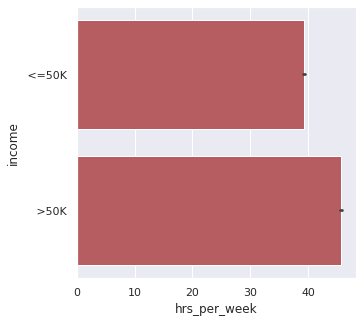

In [231]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(df1["hrs_per_week"],df1["income"],color='r')


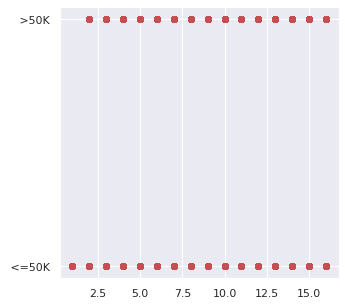

In [232]:
#sns.set(rc={'figure.figsize':(5,5)})
plt.scatter(df1["education_num"],df1["income"],color='r')
plt.show()

In [233]:
pd.crosstab(df1.race,df1.income)

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,252,34
Asian-Pac-Islander,647,248
Black,2451,366
Other,210,21
White,19094,6839


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
df = pd.concat([df1,df2],ignore_index=True)

### **Changing all categorical values in numeric**

In [0]:
le = LabelEncoder()
def label_encoder(i):
  le.fit(df[i])
  return(le.transform(df[i]))
for i in categorical:
  df[i] = label_encoder(i)  

In [0]:
#df["income"] = df["income"].map({'<=50K': 0, '>50K':1})
df.replace({'income' : { ' <=50K' : 0, ' <=50K.' : 0, ' >50K' : 1, ' >50K.' : 1}},inplace = True)

In [238]:
df["income"].unique()

array([0, 1])

In [0]:
from sklearn.utils import shuffle
df = shuffle(df)

In [0]:
#Dropping columns as capital gain and capital loss has mostly 0 and education num has random values
df3 = df.drop(["capital_gain","capital_loss","education_num"],axis = 1)

In [0]:
# split data into train and test 
x_train = df3.iloc[0:32561,0:11]
y_train = df3.iloc[0:32561,11]
x_test = df3.iloc[32561: ,0:11]
y_test = df3.iloc[32561: ,11]

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### **MODELS FOR PREDICTION**

In [0]:
model1 = LogisticRegression()
model2 = RandomForestClassifier(n_estimators=200)
model3 = GaussianNB()
model4 =  XGBClassifier()


In [0]:
def model(x_train,y_train,x_test):
  y_pred1 = model1.fit(x_train,y_train).predict(x_test)
  acc1 = accuracy_score(y_test,y_pred1)
  print("Accuracy for logistic Regressor is: ", acc1)
  y_pred2 = model2.fit(x_train,y_train).predict(x_test)
  acc2 = accuracy_score(y_test,y_pred2)
  print("Accuraccy for Random forest Classifier is: ", acc2)
  y_pred3 = model3.fit(x_train,y_train).predict(x_test)
  acc3 = accuracy_score(y_test,y_pred3)
  print("Accuracy for Naive Bayes is: ", acc3)
  y_pred4 = model4.fit(x_train,y_train).predict(x_test)
  acc4 = accuracy_score(y_test,y_pred4)
  print("Accuracy for XGBoost Classifier is: ", acc4)

In [245]:
model(x_train,y_train,x_test)

Accuracy for logistic Regressor is:  0.7488350051338757
Accuraccy for Random forest Classifier is:  0.8214990916989179
Accuracy for Naive Bayes is:  0.7617881683911223
Accuracy for XGBoost Classifier is:  0.8327146354948266


### **USING PRINCIPAL COMPONENT ANALYSIS**

In [0]:
X = df.iloc[ : ,0:14]
Y = df.iloc[ : ,14]

In [0]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

In [0]:
x_train = X[0:32561]
x_test = X[32561:]
y_train = Y[0:32561]
y_test = Y[32561:]

In [250]:
model(x_train,y_train,x_test)

Accuracy for logistic Regressor is:  0.8155753889898112
Accuraccy for Random forest Classifier is:  0.8518284495695443
Accuracy for Naive Bayes is:  0.7903799068004107
Accuracy for XGBoost Classifier is:  0.8574362214674986
